# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [58]:
simulate_data <- function(n,X_std,eps_std,beta_0,beta_1,beta_2,beta_3) {
    
    X_1 = rnorm(n,0,X_std)
    X_2 = X_1^2
    X_3 = X_1^3
    X_4 = X_1^4
    X_5 = X_1^5
    X_6 = X_1^6
    X_7 = X_1^7
    X_8 = X_1^8
    X_9 = X_1^9
    X_10 = X_1^10
    eps = rnorm(n,0,eps_std)
    
    Y = beta_0 + beta_1 * X_1 + beta_2 * X_2 + beta_3 * X_3 + eps
    
    return(data.frame(X_1=X_1,X_2=X_2,X_3=X_3,X_4=X_4,X_5=X_5,X_6=X_6,X_7=X_7,X_8=X_8,X_9=X_9,X_10=X_10,Y=Y))
}

In [59]:
n=100
X_std=10
eps_std=1

beta_0=4
beta_1=3
beta_2=2
beta_3=1

dat <- simulate_data(n,X_std,eps_std,beta_0,beta_1,beta_2,beta_3)

head(dat)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.721593,2.963881,5.102597,8.784593e+00,1.512349e+01,2.603649e+01,4.482424e+01,7.716908e+01,1.328537e+02,2.287200e+02,17.69095
2,-9.697068,94.033133,-911.845713,8.842230e+03,-8.574371e+04,8.314626e+05,-8.062750e+06,7.818503e+07,-7.581656e+08,7.351984e+09,-747.94110
3,3.619009,13.097230,47.398998,1.715374e+02,6.207956e+02,2.246665e+03,8.130702e+03,2.942509e+04,1.064897e+05,3.853871e+05,88.99284
4,-4.086845,16.702300,-68.259709,2.789668e+02,-1.140094e+03,4.659388e+03,-1.904219e+04,7.782249e+04,-3.180485e+05,1.299815e+06,-44.27330
5,26.184931,685.650600,17953.713493,4.701167e+05,1.230997e+07,3.223358e+08,8.440341e+09,2.210098e+11,5.787125e+12,1.515355e+14,19406.89032
6,20.494862,420.039382,8608.649303,1.764331e+05,3.615972e+06,7.410884e+07,1.518851e+09,3.112863e+10,6.379770e+11,1.307525e+13,9514.04928


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [60]:
install.packages("leaps")

Installing package into ‘/opt/homebrew/lib/R/4.1/site-library’
(as ‘lib’ is unspecified)



In [61]:
library(leaps)

In [62]:
?regsubsets

Warning message in fetch(key):
“internal error -3 in R_decompress1”
ERROR while rich displaying an object: Error in fetch(key): lazy-load database '/opt/homebrew/lib/R/4.1/site-library/leaps/help/leaps.rdb' is corrupt

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepa

In [86]:
regfit.full = regsubsets(Y~.,data=dat, nvmax=10)

reg.summary = summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(Y ~ ., data = dat, nvmax = 10)
10 Variables  (and intercept)
     Forced in Forced out
X_1      FALSE      FALSE
X_2      FALSE      FALSE
X_3      FALSE      FALSE
X_4      FALSE      FALSE
X_5      FALSE      FALSE
X_6      FALSE      FALSE
X_7      FALSE      FALSE
X_8      FALSE      FALSE
X_9      FALSE      FALSE
X_10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X_1 X_2 X_3 X_4 X_5 X_6 X_7 X_8 X_9 X_10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " " 
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " " 
5  ( 1 )  "*" "*" "*" "*" " " "*" " " " " " " " " 
6  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " " " 
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*" 
8  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" "*" " " 
9  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" "*" "*" 
10  ( 1 ) "*" "*" "*" "*" "*" 

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

min_cp = 3

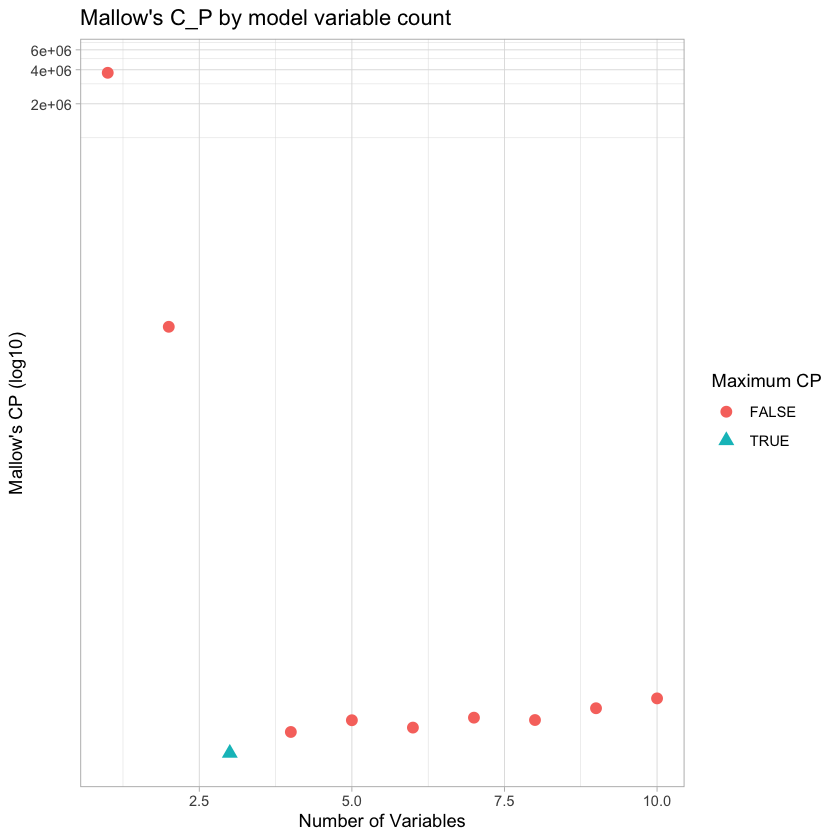

In [64]:
library(tidyverse)
numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE

cat(sprintf("min_cp = %d", which.min(reg.summary$cp)))

ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + 
    theme_light() + 
    coord_trans(y = "log10") +
    labs(title ="Mallow's C_P by model variable count", 
         x = "Number of Variables", 
         y = "Mallow's CP (log10)", 
         color="Maximum CP", 
         shape="Maximum CP")

min_bic = 3

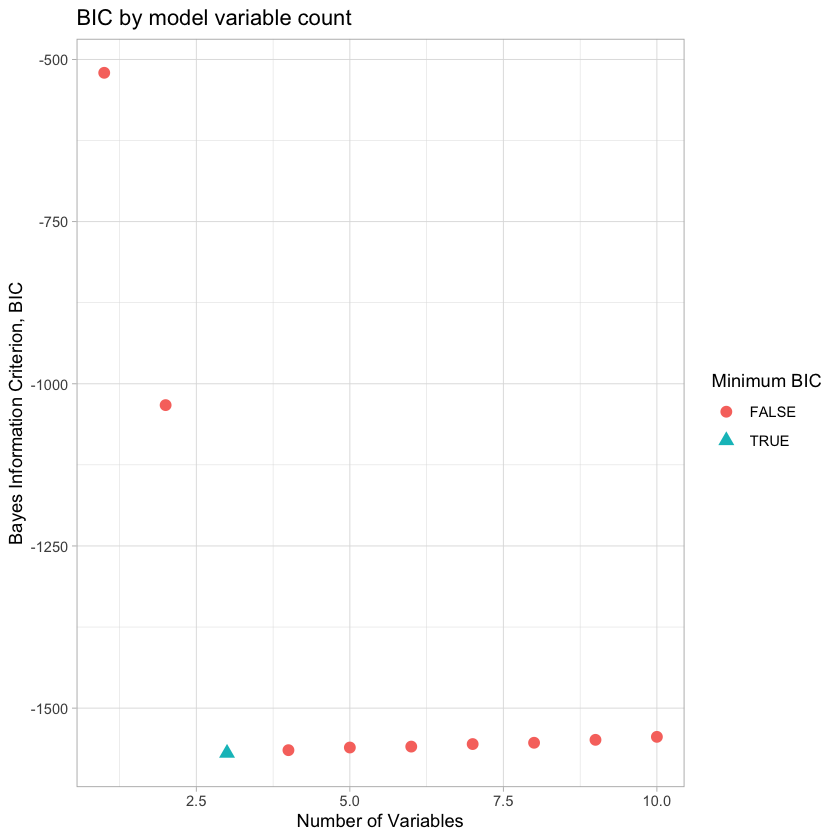

In [65]:
#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE

cat(sprintf("min_bic = %d", which.min(reg.summary$bic)))

ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) +
    theme_light() + 
    labs(title ="BIC by model variable count", 
         x = "Number of Variables", 
         y = "Bayes Information Criterion, BIC",
         color="Minimum BIC",
         shape="Minimum BIC")

max_adjr2 = 8

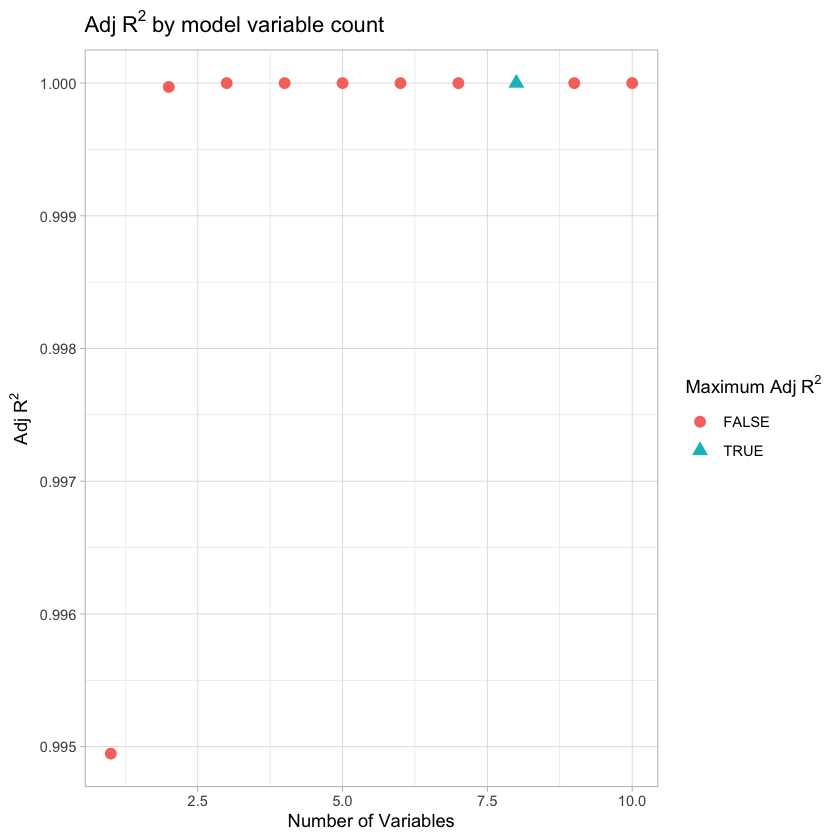

In [71]:
#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE

cat(sprintf("max_adjr2 = %d", which.max(reg.summary$adjr2)))

ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) +
    theme_light() + 
    labs(title ='Adj'~R^2~'by model variable count', 
         x = "Number of Variables", 
         y = 'Adj'~R^2, 
         color='Maximum Adj'~R^2, 
         shape='Maximum Adj'~R^2)


Both Mallow's C_p and BIC returned the "true" model, that is, the best 3-variable subset model (plus $\beta_0$ intercept), $Y\sim X, X^2, X^3$. Adding additional orders beyond $n=3$, which we know to be ground truth, yields a slightly increased factor, penalizing model verbosity.

The $Adj\_R^2$ results, on the other hand, would imply the 8th-order model (which is all $X$ except $X^5$ and $X^{10}$) is the best. That said, the $R^2$ when $n\geq 2$ is almost already at the $R^2$ ceiling, $R^2=1$.

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

In [85]:
regfit.fwd = regsubsets(Y~.,data=dat, nvmax=10,method="forward")

reg_fwd.summary = summary(regfit.fwd)
reg_fwd.summary

Subset selection object
Call: regsubsets.formula(Y ~ ., data = dat, nvmax = 10, method = "forward")
10 Variables  (and intercept)
     Forced in Forced out
X_1      FALSE      FALSE
X_2      FALSE      FALSE
X_3      FALSE      FALSE
X_4      FALSE      FALSE
X_5      FALSE      FALSE
X_6      FALSE      FALSE
X_7      FALSE      FALSE
X_8      FALSE      FALSE
X_9      FALSE      FALSE
X_10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X_1 X_2 X_3 X_4 X_5 X_6 X_7 X_8 X_9 X_10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " " 
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " " 
5  ( 1 )  "*" "*" "*" "*" " " "*" " " " " " " " " 
6  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " " " 
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*" 
8  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" "*" "*" 
9  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" "*" "*" 
10  ( 1 ) "*"

min_cp = 3

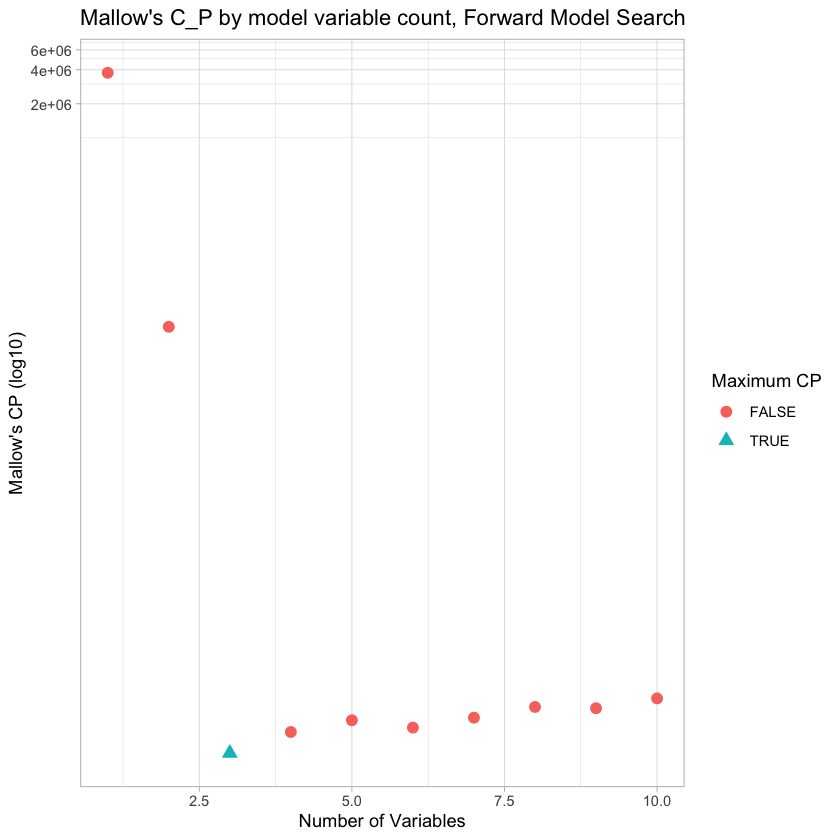

In [87]:
numvar = 1:length(reg_fwd.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg_fwd.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg_fwd.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg_fwd.summary$cp)] <- TRUE

cat(sprintf("min_cp = %d", which.min(reg_fwd.summary$cp)))

ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + 
    theme_light() + 
    coord_trans(y = "log10") +
    labs(title ="Mallow's C_P by model variable count, Forward Model Search", 
         x = "Number of Variables", 
         y = "Mallow's CP (log10)", 
         color="Maximum CP", 
         shape="Maximum CP")

min_bic = 3

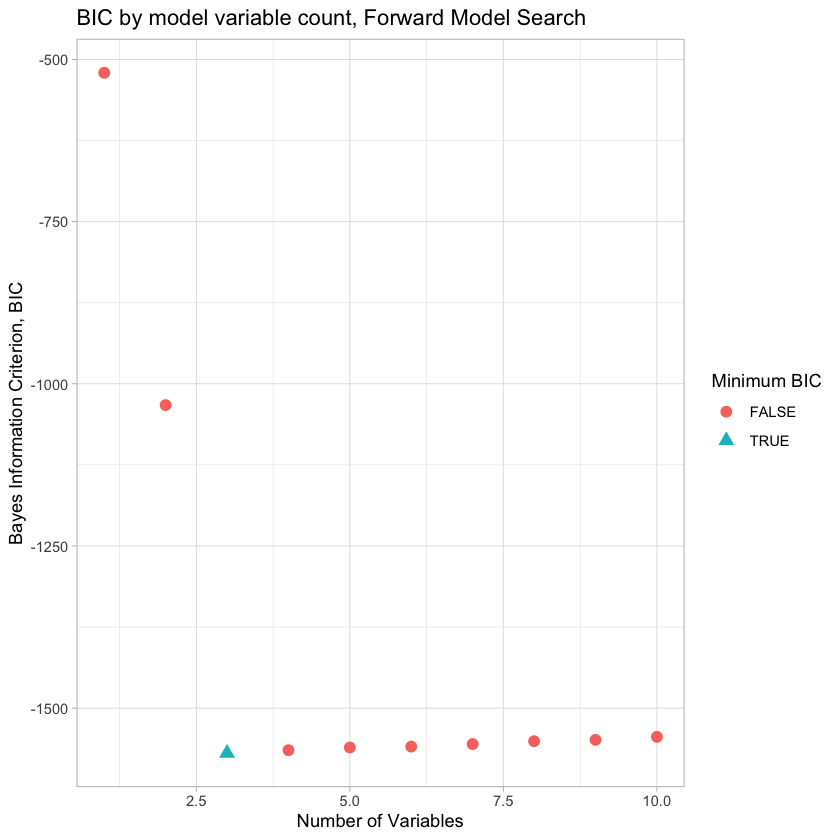

In [89]:
#bic
bic.df <- data.frame(numvar = numvar,bic <- reg_fwd.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg_fwd.summary$bic)] <- TRUE

cat(sprintf("min_bic = %d", which.min(reg_fwd.summary$bic)))

ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) +
    theme_light() + 
    labs(title ="BIC by model variable count, Forward Model Search", 
         x = "Number of Variables", 
         y = "Bayes Information Criterion, BIC",
         color="Minimum BIC",
         shape="Minimum BIC")

max_adjr2 = 9

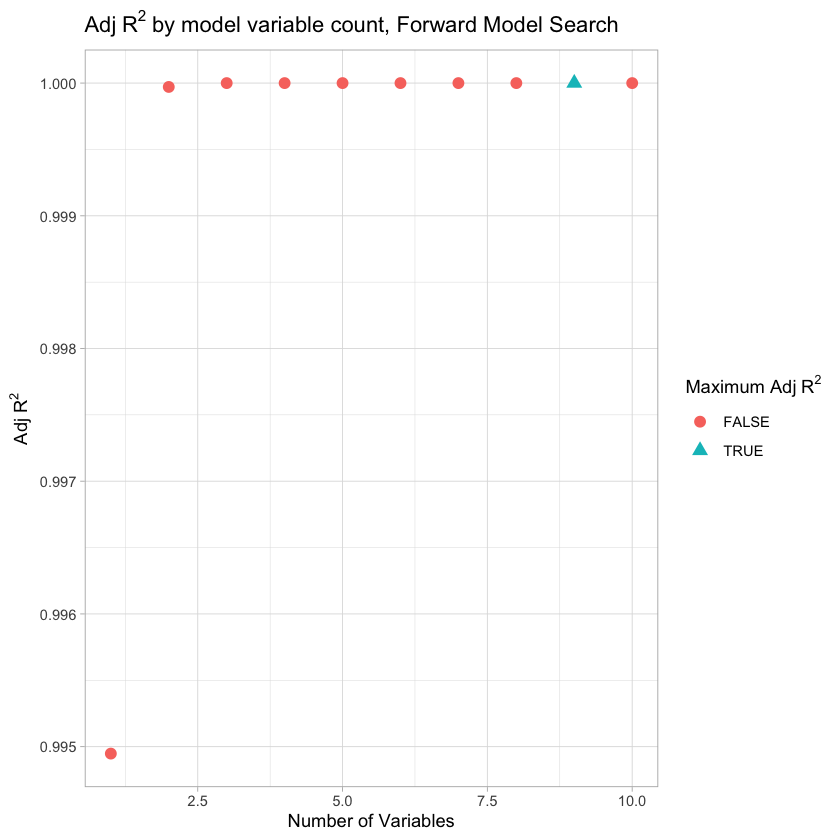

In [98]:
#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg_fwd.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg_fwd.summary$adjr2)] <- TRUE

cat(sprintf("max_adjr2 = %d", which.max(reg_fwd.summary$adjr2)))

ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) +
    theme_light() + 
    labs(title ='Adj'~R^2~'by model variable count, Forward Model Search', 
         x = "Number of Variables", 
         y = 'Adj'~R^2, 
         color='Maximum Adj'~R^2, 
         shape='Maximum Adj'~R^2)

b) Backwards stepwise selection:

In [96]:
regfit.bck = regsubsets(Y~.,data=dat, nvmax=10,method="backward")

reg_bck.summary = summary(regfit.bck)
reg_bck.summary

Subset selection object
Call: regsubsets.formula(Y ~ ., data = dat, nvmax = 10, method = "backward")
10 Variables  (and intercept)
     Forced in Forced out
X_1      FALSE      FALSE
X_2      FALSE      FALSE
X_3      FALSE      FALSE
X_4      FALSE      FALSE
X_5      FALSE      FALSE
X_6      FALSE      FALSE
X_7      FALSE      FALSE
X_8      FALSE      FALSE
X_9      FALSE      FALSE
X_10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          X_1 X_2 X_3 X_4 X_5 X_6 X_7 X_8 X_9 X_10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " " 
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " " 
5  ( 1 )  "*" "*" "*" "*" " " "*" " " " " " " " " 
6  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " " " 
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" "*" " " 
8  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" "*" " " 
9  ( 1 )  "*" "*" "*" "*" "*" "*" " " "*" "*" "*" 
10  ( 1 ) "

min_cp = 3

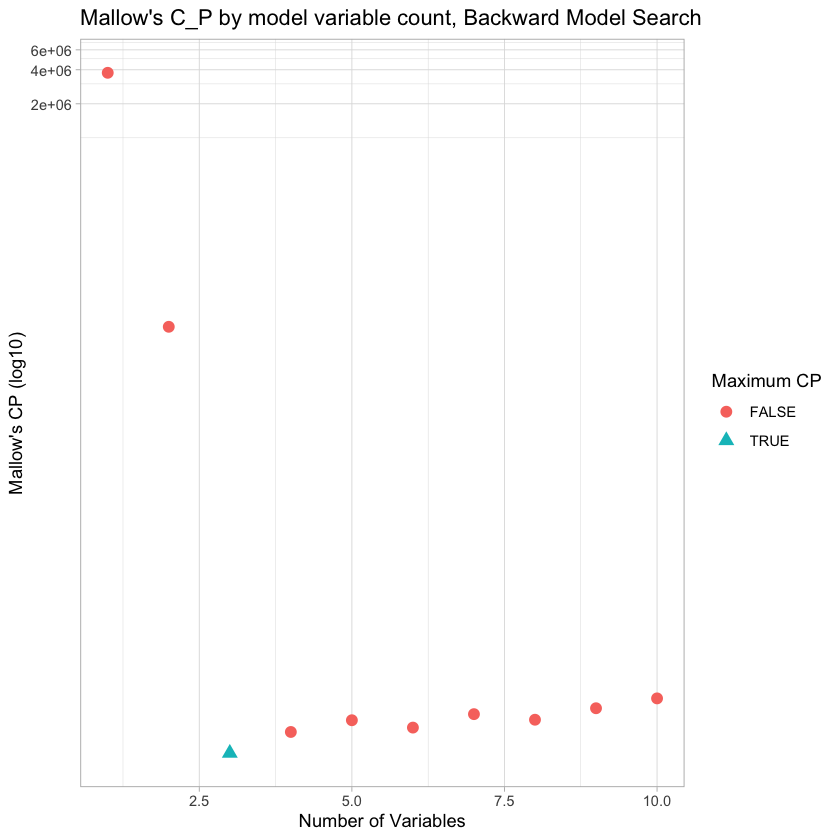

In [99]:
numvar = 1:length(reg_bck.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg_bck.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg_bck.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg_bck.summary$cp)] <- TRUE

cat(sprintf("min_cp = %d", which.min(reg_bck.summary$cp)))

ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + 
    theme_light() + 
    coord_trans(y = "log10") +
    labs(title ="Mallow's C_P by model variable count, Backward Model Search", 
         x = "Number of Variables", 
         y = "Mallow's CP (log10)", 
         color="Maximum CP", 
         shape="Maximum CP")

min_bic = 3

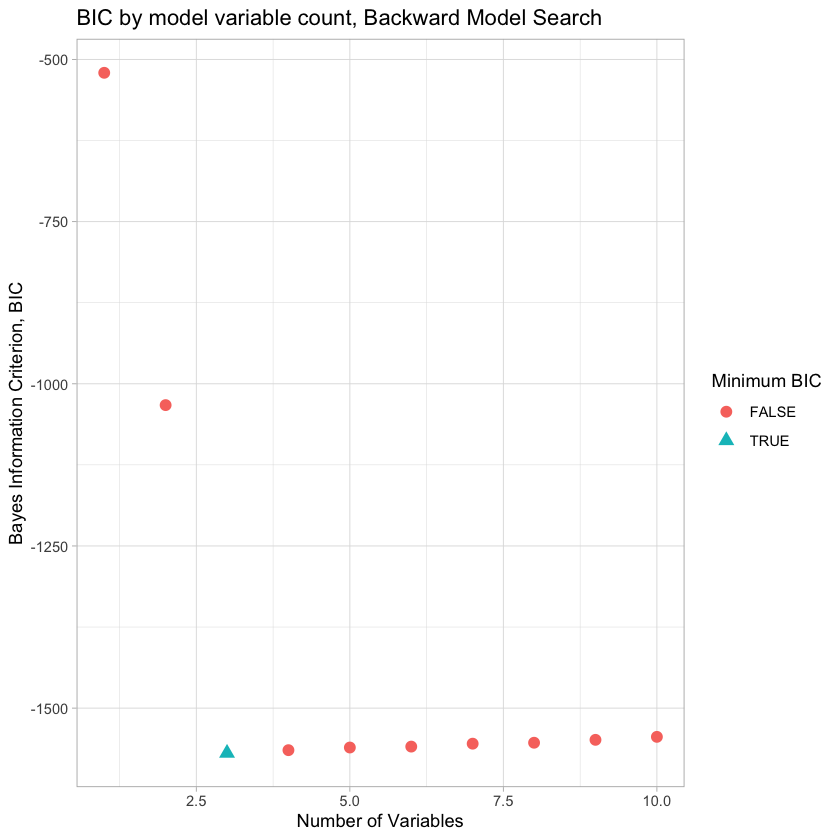

In [100]:
#bic
bic.df <- data.frame(numvar = numvar,bic <- reg_bck.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg_bck.summary$bic)] <- TRUE

cat(sprintf("min_bic = %d", which.min(reg_bck.summary$bic)))

ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) +
    theme_light() + 
    labs(title ="BIC by model variable count, Backward Model Search", 
         x = "Number of Variables", 
         y = "Bayes Information Criterion, BIC",
         color="Minimum BIC",
         shape="Minimum BIC")

max_adjr2 = 8

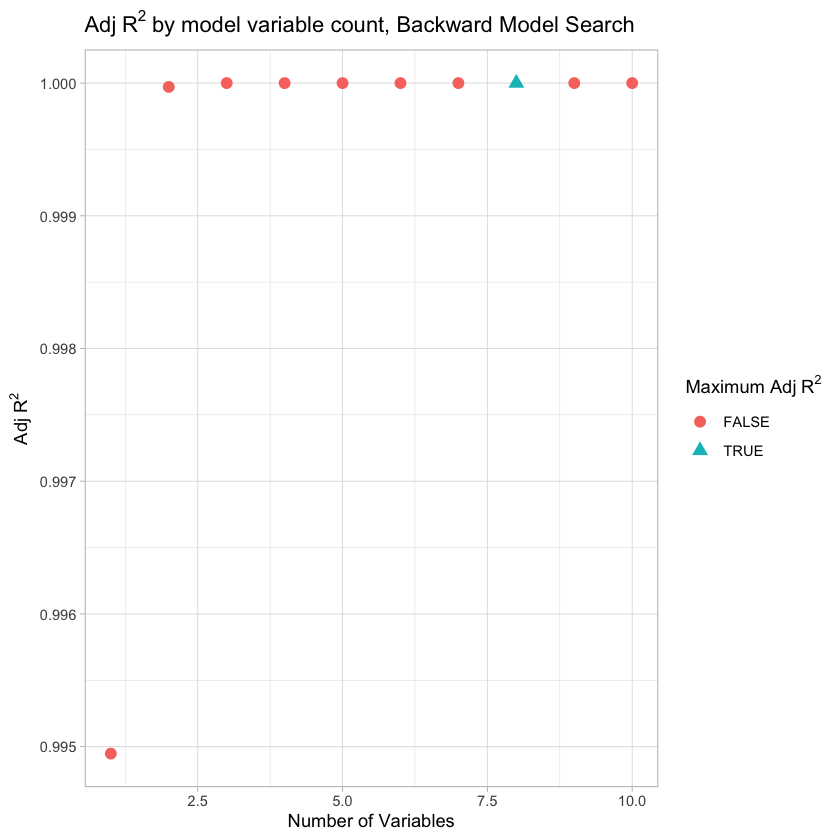

In [101]:
#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg_bck.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg_bck.summary$adjr2)] <- TRUE

cat(sprintf("max_adjr2 = %d", which.max(reg_bck.summary$adjr2)))

ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) +
    theme_light() + 
    labs(title ='Adj'~R^2~'by model variable count, Backward Model Search', 
         x = "Number of Variables", 
         y = 'Adj'~R^2, 
         color='Maximum Adj'~R^2, 
         shape='Maximum Adj'~R^2)

c) Compare your results from parts a and b with those of question 1.

[1] "exhaustive.png"


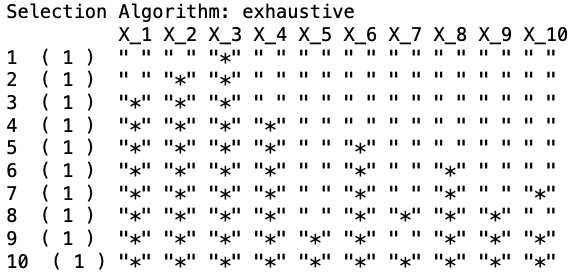

[1] "forward.png"


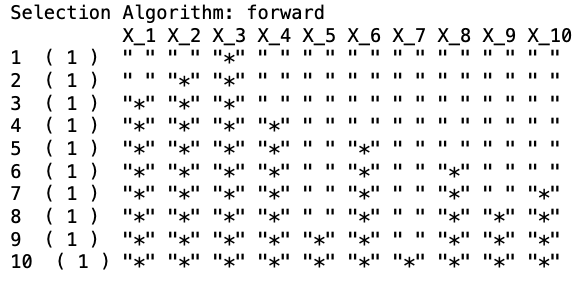

[1] "backward.png"


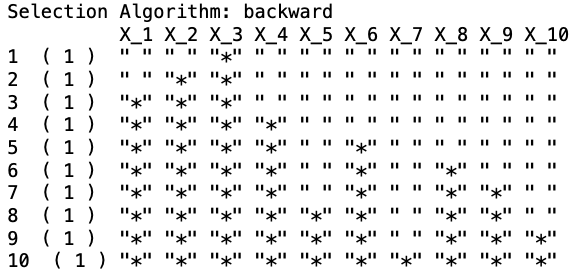

In [97]:
library("IRdisplay")

print("exhaustive.png")
display_png(file="exhaustive.png")  

print("forward.png")
display_png(file="forward.png")  

print("backward.png")
display_png(file="backward.png")  

Crucially, all three models match where it matters most, that is, around truth $n=3$. All three models produce the same Mallow's C_P and BIC results of $n=3, Y\sim X, X^2, X^3$. Higher orders produced slightly different results, which can be attributed to fitting to noise, so the forward and backward algorithms find local minima at different times.

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

In [165]:
simulate_data2 <- function(n,p) {
    
    x <- array(numeric(),c(n,p)) 
    beta <- array(numeric(),c(p,1))
    
    
    for (i in 1:p) {
        x[,i] = rnorm(n,0,1)
        if (i < 9 || i > 12) { # beta[9:12]==0.
            beta[i] = runif(1, min = -5, max = 5)
        } else {
            beta[i] = 0
        }
    }
    
    # Y should be a 1000x1 = 20x1000 X 1000x1 matmul
    Y = x %*% beta + rnorm(n,0,3)
    
    my_list <- list("dat" = data.frame(X=x,Y=Y), "beta" = beta)
    
    return(my_list)
}

In [177]:
n=1000
p=20

sd <- simulate_data2(n,p)

head(sd$dat)

cat("For refrence, here's beta:")
t(beta)

,X.1,X.2,X.3,X.4,X.5,X.6,X.7,X.8,X.9,X.10,⋯,X.12,X.13,X.14,X.15,X.16,X.17,X.18,X.19,X.20,Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.6267395,0.1591932,0.9356669,-1.1209399,0.5106476,0.69066661,1.29471739,0.01758858,0.195046471,-0.01447765,⋯,0.21631466,-0.43174388,1.0622847,-1.2408136,0.688232856,1.5132944,0.2463711,-0.2771793,0.0661886654,19.635293
2,-0.9170314,0.7084975,-0.3331613,-0.3019520,-0.5196160,-0.02539445,0.64896463,-0.35923444,1.254195714,0.58027308,⋯,-1.54571068,-1.64344074,-1.5225254,0.5365151,-0.994237099,0.5873428,0.8180818,0.7323545,0.6745190761,-1.263854
3,-1.4754627,1.2999924,0.3551363,0.3766051,-1.5396520,1.47806011,-0.06640639,-0.64452546,2.070190614,0.24527380,⋯,-0.32968827,-0.50683246,-0.3474352,0.6323477,0.365422671,-2.0555079,0.1155445,1.3618144,1.8392634333,-1.083145
4,1.7222465,0.7118684,-1.1115122,2.2152903,-0.1171830,0.66045278,-0.20475285,-0.61482251,-0.848074308,1.11969580,⋯,-0.59610698,-0.02145467,0.3526193,-0.1191628,0.662316260,-0.1398347,0.6593948,-0.7056664,1.8087899084,4.933106
5,0.5137551,0.8582702,0.1617036,0.5375716,-0.1043414,-1.10669695,0.30284150,-0.27309942,0.002028106,0.11930204,⋯,1.02787444,0.62814926,-0.5167110,0.7338498,-0.001988935,-0.7275668,-1.9359133,0.7150344,-0.5031366639,-6.543250
6,0.4423011,0.1146353,-0.5820075,1.1874562,-2.1380969,0.66044095,1.66997513,-0.98868261,0.176481185,-0.47305065,⋯,-0.04233229,-0.55613305,1.8267480,0.2194162,-0.155203779,-0.2135514,0.6017114,0.4225881,-0.0006360375,-20.711017


For refrence, here's beta:

-2.729304,4.705309,-2.153165,-2.376037,2.611162,1.002725,-0.7818085,-1.026652,0,0,0,0,-3.654189,0.9259243,-3.160502,-0.2245317,4.546936,0.9330694,-3.148035,3.11611


Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [174]:
dat = NULL

dat$train <- sd$dat[1:100,]
dat$test <- sd$dat[101:1000,]

summary(dat)

      Length Class      Mode
train 21     data.frame list
test  21     data.frame list

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [210]:
regfit.train = regsubsets(Y~.,data=dat$train, nvmax=20)

reg.train_summary = summary(regfit.train)
reg.train_summary

Subset selection object
Call: regsubsets.formula(Y ~ ., data = dat$train, nvmax = 20)
20 Variables  (and intercept)
     Forced in Forced out
X.1      FALSE      FALSE
X.2      FALSE      FALSE
X.3      FALSE      FALSE
X.4      FALSE      FALSE
X.5      FALSE      FALSE
X.6      FALSE      FALSE
X.7      FALSE      FALSE
X.8      FALSE      FALSE
X.9      FALSE      FALSE
X.10     FALSE      FALSE
X.11     FALSE      FALSE
X.12     FALSE      FALSE
X.13     FALSE      FALSE
X.14     FALSE      FALSE
X.15     FALSE      FALSE
X.16     FALSE      FALSE
X.17     FALSE      FALSE
X.18     FALSE      FALSE
X.19     FALSE      FALSE
X.20     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          X.1 X.2 X.3 X.4 X.5 X.6 X.7 X.8 X.9 X.10 X.11 X.12 X.13 X.14 X.15
1  ( 1 )  " " " " " " " " "*" " " " " " " " " " "  " "  " "  " "  " "  " " 
2  ( 1 )  " " " " " " " " "*" " " " " " " " " " "  " "  " "  " "  " "  "*" 
3  ( 1 )  " " " " " " " " "*" " " " " " " " " 

In [292]:
fit_data <- function(regstats,data) {
    
    reg.summary = summary(regstats)
    
    num_models = dim(reg.summary$which)[1]
    num_vars = dim(reg.summary$which)[2]
    
    mse = NULL
    mse$train <- array(numeric(),c(num_models,1))
    mse$test <- array(numeric(),c(num_models,1))
    
    df = NULL
    for (i in 1:num_models) {
        
        df <- data
        
        for (j in 2:num_vars) {
            if (isFALSE(reg.summary$which[i,j])) {
                df$train <- df$train[, ! names(df$train) %in% colnames(dat$train)[j-1], drop = F]
                df$test <- df$test[, ! names(df$test) %in% colnames(dat$test)[j-1], drop = F]
            }
        }
        
        if (isTRUE(reg.summary$which[i,1])) {
            lm.fit = lm(Y~., data=df$train)
                
            mse$train[i] = mean((df$train$Y-predict(lm.fit,df$train))^2)
            mse$test[i] = mean((df$test$Y-predict(lm.fit,df$test))^2)
        } else {
                
        }
        
        df = NULL
        
    }
    
    return(mse)
}

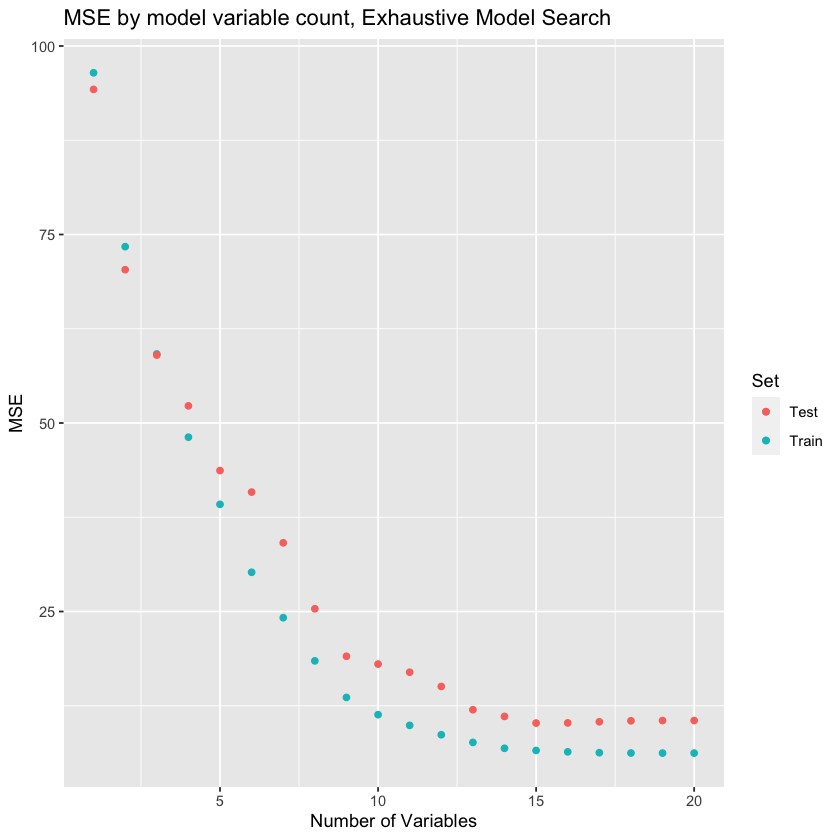

In [303]:
fit = fit_data(regfit.train,dat)

m = data.frame(idx=1:20,train=fit$train,test=fit$test)

ggplot(m, aes(x=idx,)) + 
  geom_point(aes(y = train, color = "Train")) + 
  geom_point(aes(y = test, color="Test")) +
  labs(title ="MSE by model variable count, Exhaustive Model Search", 
         x = "Number of Variables", 
         y = "MSE",
         color = "Set")

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [305]:
t(beta)

which.min(fit$test)

-2.729304,4.705309,-2.153165,-2.376037,2.611162,1.002725,-0.7818085,-1.026652,0,0,0,0,-3.654189,0.9259243,-3.160502,-0.2245317,4.546936,0.9330694,-3.148035,3.11611


[1] 15

The best model according to test MSE is the 15-variable model. Note our true betas from above, where we see indeces 9:12 are all set to 0 to geneate $Y$. Indeed, the best model skips over these variables (and erroneously includes $X.3$). That's pretty darn close! 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*